In [3]:
!pip install kagglehub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 1.9 MB/s eta 0:00:00


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mustafatomak/formula-1-dataset-1950-2021")

print("Path to dataset files:", path)

100%|██████████████████████████████████████| 36.8k/36.8k [00:00<00:00, 2.51MB/s]

Extracting files...
Path to dataset files: /Users/ava/.cache/kagglehub/datasets/mustafatomak/formula-1-dataset-1950-2021/versions/1


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pymysql

## PERSONAL ANALYSIS

In [12]:
f1data = pd.read_csv("F1_Constructor_Standings.csv")
f1data = f1data.dropna()
f1data

,Pos,Team,PTS,Year
0,1,Vanwall,48.0,1958 Constructor Standings
1,2,Ferrari,40.0,1958 Constructor Standings
2,3,Cooper Climax,31.0,1958 Constructor Standings
3,4,BRM,18.0,1958 Constructor Standings
4,5,Maserati,6.0,1958 Constructor Standings
...,...,...,...,...
660,6,AlphaTauri Honda,142.0,2021 Constructor Standings
661,7,Aston Martin Mercedes,77.0,2021 Constructor Standings
662,8,Williams Mercedes,23.0,2021 Constructor Standings
663,9,Alfa Romeo Racing Ferrari,13.0,2021 Constructor Standings


## Which Team has Won the Most Constructors Championships?

In [15]:
f1data_winner = f1data[f1data["Pos"]=="1"]

In [17]:
team_win_type = pd.crosstab(f1data_winner["Pos"], f1data_winner["Team"])
np.array(team_win_type)[0]

array([ 1,  1,  2,  1,  2, 16,  2,  5,  1,  1,  4,  1,  2,  8,  1,  3,  2,
        1,  1,  2,  2,  5])

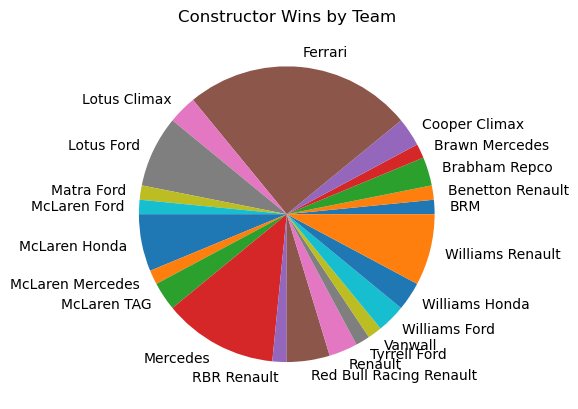

In [173]:
plt.pie(np.array(team_win_type)[0], labels = team_win_type.T.index) 
plt.title("Constructor Wins by Team")
plt.show()

Ferrari has won the most 

## Can the Winners of the 2022 Race be Predicted Based on the Data Set?

In [183]:
#import k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
#import the function for train-test split
from sklearn.model_selection import train_test_split
#import accuracy score to measure accuracy
from sklearn.metrics import accuracy_score
# import confusion matrix to see if puter knows what up
from sklearn.metrics import ConfusionMatrixDisplay

In [200]:
f1data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pos     665 non-null    object 
 1   Team    665 non-null    object 
 2   PTS     665 non-null    float64
 3   Year    665 non-null    object 
dtypes: float64(1), object(3)
memory usage: 20.9+ KB


In [248]:
X = np.array(f1data["PTS"])
y = np.array(f1data["Pos"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

In [250]:
X_train

array([ 49. ,   8. ,   6. ,   4. ,   1. ,   1. , 137. ,  48. ,  37. ,
        13. ,   3. , 151. ,   1. ,  77. ,  13. ,   0. ,  86. ,   8. ,
       204. ,   2. ,  38. ,  19. ,   1. ,  48. ,   3. ,  89. ,  33. ,
        72. ,   2. ,   6. ,   1. ,  67. ,   3. ,  34. ,   9. ,  57. ,
        73. ,  67. ,   5. , 122. , 354. , 323.5,  26. ,   5. ,  10. ,
         2. ,   5. ,  24. ,   0. , 191. ,  69. , 110. ,   5. ,  31. ,
        13. ,   1. ,   7. , 133. ,   8. ,  30. ,  35. ,  71. , 156. ,
        73. , 668. , 164. ,   3. ,  52. ,  13. ,   1. ,  19. , 143.5,
        26. ,  72.5,  36. ,  63. ,  69. ,  52. , 655. ,  72. ,  44. ,
         5. ,  48. ,  23. ,   6. ,  31. , 199. ,   3. ,   6. , 173. ,
         7. , 504. ,  19. ,  12. ,  33. ,   1. ,  10. ,  19. , 214. ,
         6. ,  28. ,   6. ,  12. , 170. ,   3. ,   3. ,  16. , 102. ,
        71. ,   6. ,  78. ,   7. , 101. ,   7. , 113. , 181. ,   3. ,
        35. , 179. ,   9. ,  12. ,  30. , 522. ,  85. ,  10. ,   0. ,
        30. ,   0. ,

In [256]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train.reshape(-1,1), y_train)
prediction = classifier.predict(X_test.reshape(-1,1))

print(prediction[0:100])

['10' '3' '11' '10' '10' '1' '10' '3' '2' '11' '5' '5' '2' '4' '10' '6'
 '5' '10' '5' '2' '5' '10' '10' '5' '5' '2' '3' '2' '5' '3' '1' '4' '3'
 '10' '3' '9' '5' '6' '1' '11' '10' '6' '10' '11' '1' '3' '10' '3' '9' '1'
 '3' '11' '10' '5' '10' '2' '6' '2' '10' '11' '2' '1' '3' '10' '10' '2'
 '3' '10' '1' '2' '10' '3' '4' '1' '11' '5' '2' '1' '10' '10' '10' '10'
 '11' '10' '5' '10' '1' '1' '3' '1' '2' '1' '6' '2' '4' '4' '10' '1' '10'
 '2']


In [258]:
print(y_test[0:100])

['11' '5' '8' '11' '8' '5' '10' '8' '4' '11' '5' '8' '3' '1' '9' '8' '7'
 '12' '2' '1' '5' '11' '11' '5' '5' '8' '2' '1' '4' '4' '1' '6' '5' '9'
 '7' '10' '4' '5' '2' '9' '6' '6' '7' '9' '6' '9' '6' '4' '12' '3' '7' '7'
 '9' '5' '13' '6' '7' '3' '6' '6' '2' '3' '2' '11' '6' '3' '2' '4' '1' '5'
 '7' '7' '4' '1' '8' '6' '5' '3' '9' '8' '8' '11' '7' '14' '8' '10' '1'
 '5' '6' '2' '2' '1' '5' '4' '5' '3' '10' '1' '9' '7']


In [260]:
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.17293233082706766


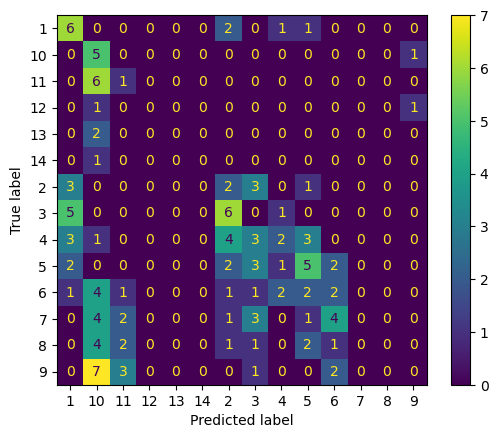

In [264]:
ConfusionMatrixDisplay.from_estimator(classifier, X_test.reshape(-1,1), y_test)

As you can see from the chart, the model failed to make a good prediction. This can be explained by the lack of data, as well as the general difficulty to predict the outcomes of a sporting event involving so many different factors such as Formula 1. 

## Required Analysis

In order to complete the required analysis, I had to import a separate sub-dataset under my original choice of data set due to the lack of ability I found to complete a data analysis. 

In [35]:
import kagglehub

path = kagglehub.dataset_download("mustafatomak/formula-1-dataset-1950-2021")

print("Path to dataset files:", path)

Path to dataset files: /Users/ava/.cache/kagglehub/datasets/mustafatomak/formula-1-dataset-1950-2021/versions/1


In [39]:
driver_data = pd.read_csv("F1_Driver_Standings (1).csv")
driver_data

,Pos,Driver,Nationality,Car,PTS,Year
0,1,Nino Farina FAR,ITA,Alfa Romeo,30.0,1950 Driver Standings
1,2,Juan Manuel Fangio FAN,ARG,Alfa Romeo,27.0,1950 Driver Standings
2,3,Luigi Fagioli FAG,ITA,Alfa Romeo,24.0,1950 Driver Standings
3,4,Louis Rosier ROS,FRA,Talbot-Lago,13.0,1950 Driver Standings
4,5,Alberto Ascari ASC,ITA,Ferrari,11.0,1950 Driver Standings
...,...,...,...,...,...,...
1591,17,Nicholas Latifi LAT,CAN,Williams Mercedes,7.0,2021 Driver Standings
1592,18,Antonio Giovinazzi GIO,ITA,Alfa Romeo Racing Ferrari,3.0,2021 Driver Standings
1593,19,Mick Schumacher MSC,GER,Haas Ferrari,0.0,2021 Driver Standings
1594,20,Robert Kubica KUB,POL,Alfa Romeo Racing Ferrari,0.0,2021 Driver Standings


Descriptive Analsyis

In [41]:
driver_data.describe()

,PTS
count,1596.000000
mean,28.838033
std,55.660006
min,0.000000
25%,3.000000
50%,9.000000
75%,30.000000
max,413.000000


## Categorical Analysis

In [43]:
nationality = driver_data["Nationality"]
car = driver_data["Car"]


car_nation_type = pd.crosstab(driver_data["Nationality"], driver_data["Car"])


c, p , dof, expected = scipy.stats.chi2_contingency(car_nation_type)
print("The P Value Is:", p)

The P Value Is: 0.0


The p value being 0.0 makes sense when using the terms "Nationality" and "Car". While many of the companies of cars share the same countries as many drivers, such as Antonio Giovinazzi, an Italian Driver (retired in 2023), racing for Ferrari, which is an Italian company, it is not more likely that an Italian driver will drive under an Italian-based car company, rather mere happenstance. 

Additionally, due to the p value of 0.0 between the only two numerical columns of data, there can not be any linear regression or scatter plots created to visulaize the data, as there is no data present within the data set to be analyzed.

To do the next analysis, I had to make some columns categorical, seeing as none of them in their original state are categorical.

In [153]:
driver_data.dtypes

Pos            category
Driver         category
Nationality    category
Car            category
PTS             float64
Year             object
dtype: object

In [108]:
driver_data.Pos = pd.Categorical(driver_data.Pos)
print(driver_data.Pos.cat.categories)

Index(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2',
       '20', '21', '22', '23', '24', '25', '26', '27', '28', '3', '4', '5',
       '6', '7', '8', '9', 'DQ'],
      dtype='object')


In [131]:
driver_data.Driver = pd.Categorical(driver_data.Driver)
print(driver_data.Driver.cat.categories)

Index(['Adrian Sutil SUT', 'Aguri Suzuki SUZ', 'Alain Prost PRO',
       'Alan  Jones JON', 'Alan Brown BRO', 'Alberto Ascari ASC',
       'Alessandro Nannini NAN', 'Alessandro Zanardi ZAN', 'Alex Caffi CAF',
       'Alex Yoong YOO',
       ...
       'Walt   Hansgen HAN', 'Walt  Faulkner FAU', 'Will Stevens STE',
       'Willy Mairesse MAI', 'Wilson Fittipaldi FIT', 'Wolfgang von Trips VON',
       'Yuji Ide IDE', 'Yuki Tsunoda TSU', 'Yves Giraud Cabantous CAB',
       'Zsolt Baumgartner BAU'],
      dtype='object', length=394)


In [147]:
pos = driver_data["Pos"]
driver = driver_data["Driver"]

pos_driver_type = pd.crosstab(driver_data["Driver"], driver_data["Pos"])


c, p , dof, expected = scipy.stats.chi2_contingency(pos_driver_type)
print("The P Value Is:", p)

The P Value Is: 1.550614066769598e-65


As you can see, the p Value is incredibly small. This could be such for many reasons. For example, this data set is very large, as it takes into account 394 drivers from Formula 1 from 1950 to 2021, which could significantly shorten the number of times a position was earned by a driver due to having so many drivers. Additionally, there are 22 positions that have been taken into account with this specific analysis, which could also be responsible for lessening the number of times a driver earned a certain position. 

## Numerical Analysis

In [149]:
pts = driver_data["PTS"]
driver = driver_data["Driver"]

In [143]:
for i in range(394):
    print(i, driver_data.Driver.cat.categories[i])

0 Adrian Sutil SUT
1 Aguri Suzuki SUZ
2 Alain Prost PRO
3 Alan  Jones JON
4 Alan Brown BRO
5 Alberto Ascari ASC
6 Alessandro Nannini NAN
7 Alessandro Zanardi ZAN
8 Alex Caffi CAF
9 Alex Yoong YOO
10 Alexander Albon ALB
11 Alexander Rossi RSI
12 Alexander Wurz WUR
13 Alfonso de Portago  DEP
14 Allan McNish MCN
15 Andre Pilette PIL
16 Andrea de Adamich  DEA
17 Andrea de Cesaris DEC
18 Andy Linden LIN
19 Anthony Davidson DAV
20 Antonio Giovinazzi GIO
21 Antonio Pizzonia PIZ
22 Art Cross CRO
23 Arturo Merzario MER
24 Ayrton Senna SEN
25 Bernard  Collomb  COL
26 Bertrand Gachot GAC
27 Bill  Vukovich  VUK
28 Bill Holland HOL
29 Bill Homeier HOM
30 Bob Anderson AND
31 Bob Bondurant BON
32 Bob Sweikert SWE
33 Bobby Ball BAL
34 Brausch Niemann NIE
35 Brendon Hartley HAR
36 Brian   Redman RED
37 Bruce McLaren MCL
38 Bruno Giacomelli GIA
39 Bruno Senna SEN
40 Carel Godin de Beaufort  DEB
41 Carlos Menditeguy MEN
42 Carlos Pace PAC
43 Carlos Reutemann REU
44 Carlos Sainz SAI
45 Cecil  Green GRE
46

In [161]:
driver_codes = driver_data.Driver.cat.codes
print(driver_codes)

0       271
1       196
2       225
3       218
4         5
       ... 
1591    262
1592     20
1593    250
1594    326
1595    270
Length: 1596, dtype: int16


In [214]:
pearsons = scipy.stats.pearsonr(pts, driver_codes)
corr =scipy.stats.pearsonr(pts, driver_codes)
print("Pearson's Correlation Coefficient:", corr[0])

spearmans = scipy.stats.spearmanr(pts, driver_codes)
corr1 = scipy.stats.spearmanr(pts, driver_codes)
print("Spearman's Correlation Coefficient:", corr1[0])

Pearson's Correlation Coefficient: 0.048231734765328514
Spearman's Correlation Coefficient: -0.025859730449338997


In [169]:
linear_model=scipy.stats.linregress(pts, driver_codes) 
print(linear_model)

slope=linear_model.slope #linear_model dot value you want to pull out
yint=linear_model.intercept

linear_fit=slope*pts+yint

LinregressResult(slope=0.09332043517454965, intercept=191.8244864103219, rvalue=0.0482317347653285, pvalue=0.054045985386357846, stderr=0.04840541814161527, intercept_stderr=3.033644164766523)


(0.0, 200.0)

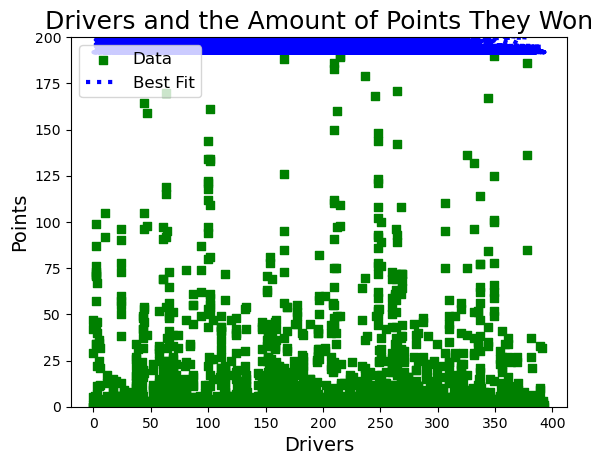

In [177]:
plt.scatter(driver_codes, pts, s=30, color="green", marker="s", label="Data")
plt.plot(driver_codes, linear_fit, linewidth=3, color="blue", linestyle=":", label="Best Fit")
plt.title("Drivers and the Amount of Points They Won", fontsize=18)
plt.xlabel("Drivers", fontsize=14)
plt.ylabel("Points", fontsize=14)
plt.legend(fontsize=12, loc="upper left")
plt.ylim(0,200)

## Machine Learning 

In [224]:
X1 = driver_data["Driver"]
y1 = driver_data["PTS"]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20)

In [232]:
classifier1 = KNeighborsClassifier(n_neighbors = 3)
classifier1.fit(X_train1.reshape(-1,1), y_train1)
prediction1 = classifier1.predict(X_test1.reshape(-1,1))

print(prediction1[0:100])

AttributeError: 'Series' object has no attribute 'reshape'

## Two Additonal Graphs of my Choice

In [245]:
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import datasets, preprocessing

Which country has won the most points in F1?

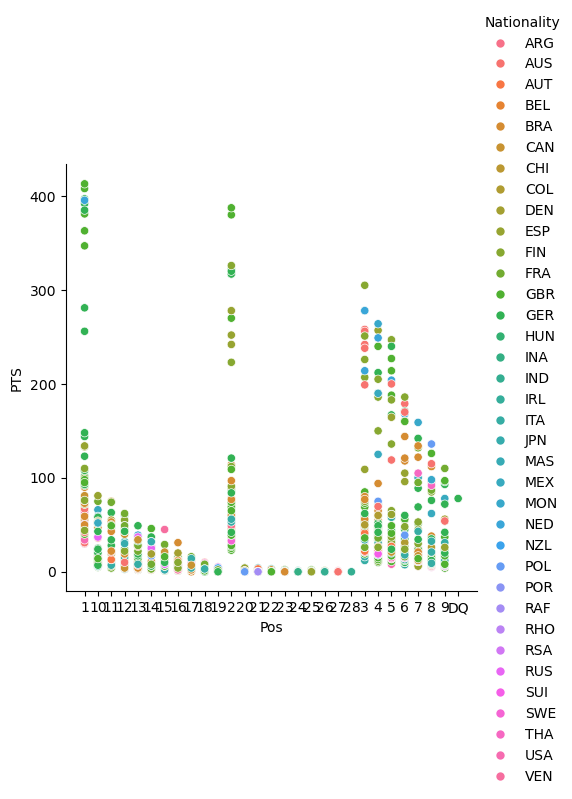

In [350]:
sns.relplot(
    data=driver_data,
    x="Pos", y="PTS", hue="Nationality", 
)

The british

In [307]:
import seaborn.objects as so

## Which Nationality is Most represented in Formula 1?

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, 'ARG'),
  Text(1, 0, 'AUS'),
  Text(2, 0, 'AUT'),
  Text(3, 0, 'BEL'),
  Text(4, 0, 'BRA'),
  Text(5, 0, 'CAN'),
  Text(6, 0, 'CHI'),
  Text(7, 0, 'COL'),
  Text(8, 0, 'DEN'),
  Text(9, 0, 'ESP'),
  Text(10, 0, 'FIN'),
  Text(11, 0, 'FRA'),
  Text(12, 0, 'GBR'),
  Text(13, 0, 'GER'),
  Text(14, 0, 'HUN'),
  Text(15, 0, 'INA'),
  Text(16, 0, 'IND'),
  Text(17, 0, 'IRL'),
  Text(18, 0, 'ITA'),
  Text(19, 0, 'JPN'),
  Text(20, 0, 'MAS'),
  Text(21, 0, 'MEX'),
  Text(22, 0, 'MON'),
  Text(23, 0, 'NED'),
  Text(24, 0, 'NZL'),
  Text(25, 0, 'POL'),
  Text(26, 0, 'POR'),
  Text(27, 0, 'RAF'),
  Text(28, 0, 'RHO'),
  Text(29, 0, 'RSA'),
  Text(30, 0, 'RUS'),
  Text(31, 0, 'SUI'),
  Text(32, 0, 'SWE'),
  Text(33, 0, 'THA'),
  Text(34, 0, 'USA'),
  Text(35, 0, 'VEN')])

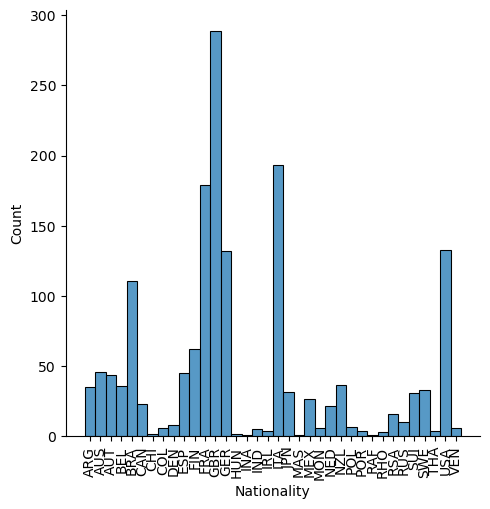

In [341]:
driver_plot = sns.displot(driver_data, x="Nationality", binwidth=20)
plt.xticks(rotation=90)

The Britsh have had the most F1 Drivers